

```
# This is formatted as code
```

Hamdan Qazi

ME-1940

ME VI-B

# Task 1

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
#loading the dataset
import pandas as pd

google_sheet_id = '1tRqZXvIdh8YCM_07zQVkbXmBp6UFaf7GGbiYpvsBR38'
mill_sheet = f'https://docs.google.com/spreadsheets/d/{google_sheet_id}/gviz/tq?tqx=out:csv&sheet=Sheet1'

df = pd.read_csv(mill_sheet)

print("Dataset loaded successfully from Google Sheets!")

Dataset loaded successfully from Google Sheets!


In [ ]:
# Displaying the first 5 rows
df.head()

,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,row_2,1,3,NaN,6,1.5,0.5,1,-0.725100,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


In [ ]:
#displaying last 5 rows
df.tail(5)

,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
175,176,row_164,16,4,NaN,4,1.50,0.50,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
176,177,row_165,16,5,0.40,6,1.50,0.50,2,-0.205080,1.381836,0.068359,0.289307,0.098877,0.114746
177,178,row_166,16,6,0.62,9,1.50,0.50,2,-0.380860,1.381836,0.041504,0.292969,0.075684,0.083008
178,179,row_153,14,10,1.14,24,0.75,0.50,2,0.253906,1.406250,0.083008,0.274658,0.092773,0.111084
179,180,row_154,15,1,NaN,1,1.50,0.25,2,-0.458980,1.357422,0.068359,0.292969,0.086060,0.104980


In [ ]:
#checking data types
df.dtypes

,0
S.no,int64
Unnamed: 1,object
case,int64
run,int64
VB,float64
time,int64
DOC,float64
feed,float64
material,int64
smcAC,float64


In [ ]:
#checking data set shape
df.shape

(180, 15)

# Task 2

In [ ]:
#cheking missing values
print(df.isnull().sum())

S.no            0
Unnamed: 1      0
case            0
run             0
VB             23
time            0
DOC             0
feed            0
material        0
smcAC           5
smcDC           1
vib_table       2
vib_spindle     4
AE_table        2
AE_spindle      1
dtype: int64


In [ ]:
#filling missing values

#dropping unnecessary columns
if 'S.no' in df.columns:
    df.drop('S.no', axis=1, inplace=True)
if 'Unnamed: 1' in df.columns:
    df.drop('Unnamed: 1', axis=1, inplace=True)
if 'DOC' in df.columns:
    df.drop('DOC', axis=1, inplace=True)
if 'feed' in df.columns:
    df.drop('feed', axis=1, inplace=True)
if 'material' in df.columns:
    df.drop('material', axis=1, inplace=True)

#for smcAC Column: interpolating
if 'smcAC' in df.columns:
    df['smcAC'].interpolate(inplace=True)

#for smcDC Column: mean value in missing cell
if 'smcDC' in df.columns:
   df['smcDC'].fillna(df['smcDC'].mean(), inplace=True)

#for vib_table column: mean in missing value cells
if 'vib_table' in df.columns:
    df['vib_table'].fillna(df['vib_table'].mean(), inplace=True)

#vib_spindle column: mean in missing value cells
if 'vib_spindle' in df.columns:
    df['vib_spindle'].fillna(df['vib_spindle'].mean(), inplace=True)

#AE_table column: mean in missing value cells
if 'AE_table' in df.columns:
    df['AE_table'].fillna(df['AE_table'].mean(), inplace=True)

#AE_spindle column: mean in missing value cells
if 'AE_spindle' in df.columns:
    df['AE_spindle'].fillna(df['AE_spindle'].mean(), inplace=True)

#VB column: training linear regression model
from sklearn.linear_model import LinearRegression

if 'VB' in df.columns:
    #columns relevant for VB prediction
    df_model_subset = df[["case", "VB", "smcAC", "smcDC", "vib_table", "vib_spindle", "AE_table", "AE_spindle"]].copy()

    #split into training (VB known) and test (VB missing) sets
    test_data = df_model_subset[df_model_subset["VB"].isnull()].copy()
    traindf = df_model_subset[df_model_subset["VB"].notnull()].copy()

    #if there are missing VB values
    if not test_data.empty:
        y_train = traindf["VB"]
        X_train = traindf.drop("VB", axis=1)
        X_test = test_data.drop("VB", axis=1)

        #training the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        #predictions on the test data
        y_pred = model.predict(X_test)

        #filling missing VB values in the original DataFrame
        df.loc[test_data.index, 'VB'] = y_pred

#checking null count after missing value filling operations
print(df.isnull().sum())


/tmp/ipython-input-777713515.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smcAC'].interpolate(inplace=True)
/tmp/ipython-input-777713515.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

case           0
run            0
VB             0
time           0
smcAC          0
smcDC          0
vib_table      0
vib_spindle    0
AE_table       0
AE_spindle     0
dtype: int64


Handling Missing Data
Unnamed column 2 : row - sensible data / drop column as row number is not needed

VB column : train linear regression model

smcAC Column: interpolate value of above and below cells

smcDC Column: mean value in 1 missing cell

vib_table: mean for both missing value cells

vib_spindle: mean values for all missing cells

AE_table: mean values for all missing cells

AE_spindle: mean values for all missing cells

In [ ]:
#checking duplicate rows
print (df.shape)
duplicated_rows = df[df.duplicated()]
print (duplicated_rows.shape)


(180, 10)
(13, 10)


In [ ]:
#dropping duplicate rows
df.count()
df = df.drop_duplicates()
print (df.shape)

(167, 10)


# Task 3

In [ ]:
#1: Center

numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    print(f"\n--- {col} ---")

    # Mean
    print(f"Mean: {df[col].mean()}")

    # Median
    print(f"Median: {df[col].median()}")

    # Mode
    print(f"Mode: {df[col].mode().tolist()}")


--- case ---
Mean: 8.32934131736527
Median: 10.0
Mode: [11]

--- run ---
Mean: 7.167664670658683
Median: 6.0
Mode: [1]

--- VB ---
Mean: 0.3397752426233516
Median: 0.31
Mode: [0.0]

--- time ---
Mean: 26.11377245508982
Median: 19.0
Mode: [3]

--- smcAC ---
Mean: -0.16728022155688624
Median: -0.18311
Mode: [0.249023]

--- smcDC ---
Mean: 1.3362619845783295
Median: 1.37207
Mode: [1.381836]

--- vib_table ---
Mean: 0.07967400443685661
Median: 0.068359
Mode: [0.061035]

--- vib_spindle ---
Mean: 0.2873837681001633
Median: 0.285645
Mode: [0.284424]

--- AE_table ---
Mean: 0.10045986947478053
Median: 0.101318
Mode: [0.092773, 0.095825, 0.098877, 0.102539, 0.109863]

--- AE_spindle ---
Mean: 0.12391432623022113
Median: 0.12207
Mode: [0.110474]



**Is tool wear normally distributed? Is the mean close to the median?**
  
  No. The 'VB' column's distribution tends to be **right-skewed**. Although the mean and median are close, the mode is at 0.0, indicating a concentration of values at the lower end, which deviates from a normal distribution.


In [ ]:
#2: Spread

for col in numerical_cols:
    print(f"--- {col} ---")

    # Standard Deviation
    std_dev_value = df[col].std()
    print(f"Standard Deviation: {std_dev_value}")

    # Variance
    variance_value = df[col].var()
    print(f"Variance: {variance_value}")

    # Range (max - min)
    range_value = df[col].max() - df[col].min()
    print(f"Range: {range_value}")

    # Interquartile Range (IQR)
    iqr_value = df[col].quantile(0.75) - df[col].quantile(0.25)
    print(f"IQR: {iqr_value}")

--- case ---
Standard Deviation: 4.764885507635303
Variance: 22.70413390087294
Range: 15
IQR: 9.0
--- run ---
Standard Deviation: 4.96936724125347
Variance: 24.694610778443117
Range: 22
IQR: 7.0
--- VB ---
Standard Deviation: 0.24545893742625713
Variance: 0.060250089962427214
Range: 1.53
IQR: 0.28
--- time ---
Standard Deviation: 23.292643019103295
Variance: 542.5472188153815
Range: 105
IQR: 31.5
--- smcAC ---
Standard Deviation: 0.3518730958520227
Variance: 0.12381467558448674
Range: 1.176758
IQR: 0.7470715
--- smcDC ---
Standard Deviation: 0.1893478934820908
Variance: 0.0358526247661052
Range: 1.450195
IQR: 0.04394600000000004
--- vib_table ---
Standard Deviation: 0.03649547792472264
Variance: 0.0013319199089539175
Range: 0.2929689895
IQR: 0.021973
--- vib_spindle ---
Standard Deviation: 0.021218614053435877
Variance: 0.00045022958234866654
Range: 0.18432600000000002
IQR: 0.023193999999999992
--- AE_table ---
Standard Deviation: 0.024692127334667066
Variance: 0.0006097011523114125
Ra

 **Which sensor shows the highest variability?**
     
  Looking at the standard deviations, the sensor **smcAC** has the highest standard deviation (0.352) and therefore shows the greatest variability


 **Does vibration vary more than current?**

 Average standard deviation for **vibration sensors** (vib_table, vib_spindle):

 (0.036 + 0.021) / 2 = **0.0285**

  Average standard deviation for **current sensors** (smcAC, smcDC):
  
  (0.352 + 0.189) / 2 = **0.2705**

  No, **vibration does not vary more than current**. The current sensors show a significantly higher average variability (0.2705) compared to the vibration sensors (0.0285).

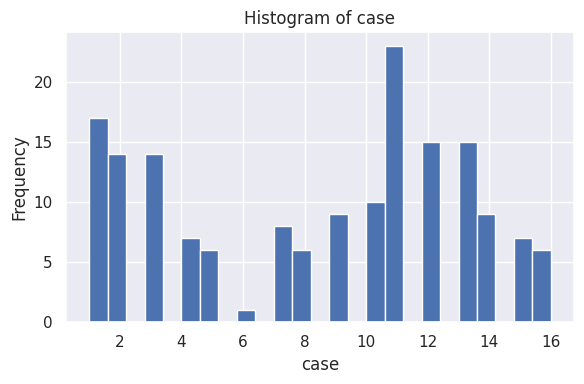

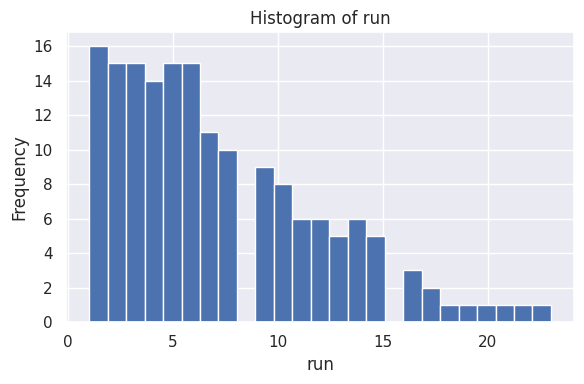

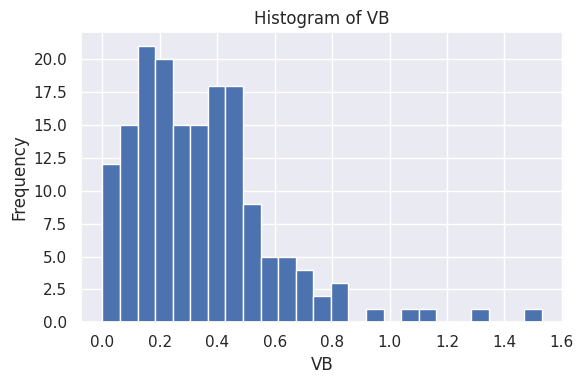

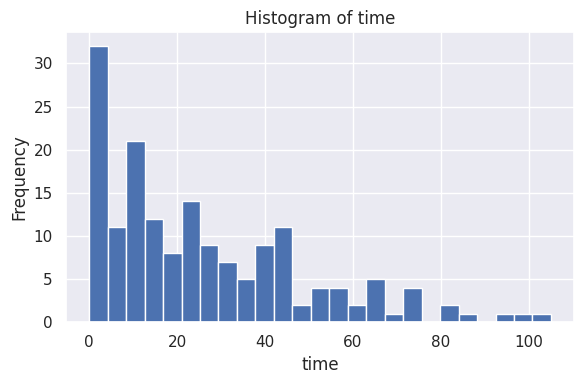

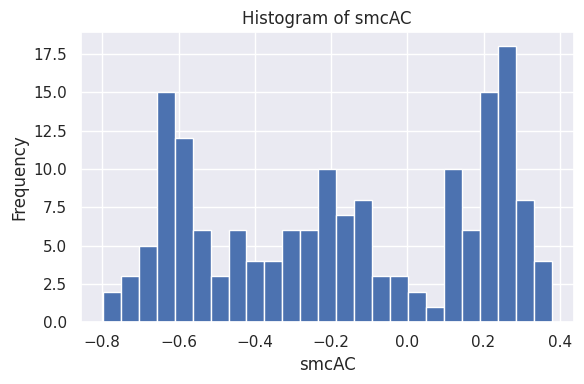

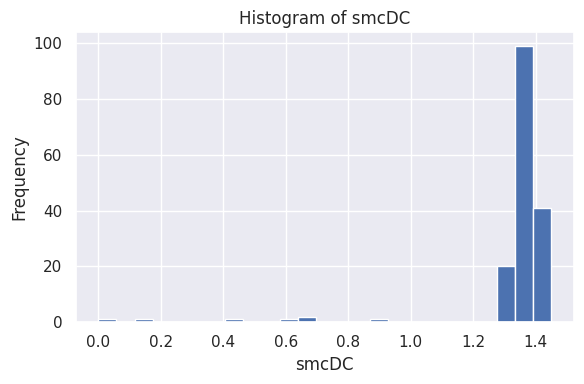

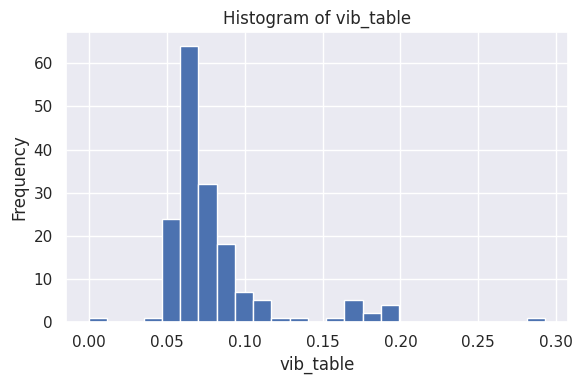

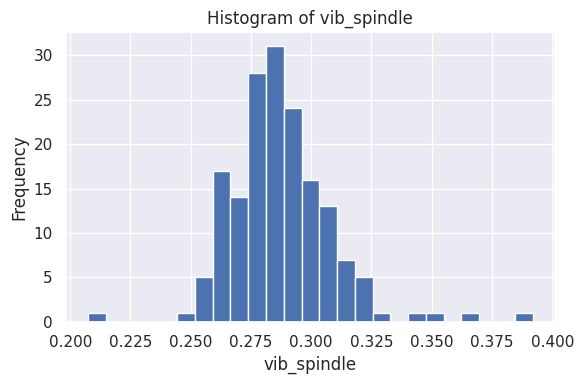

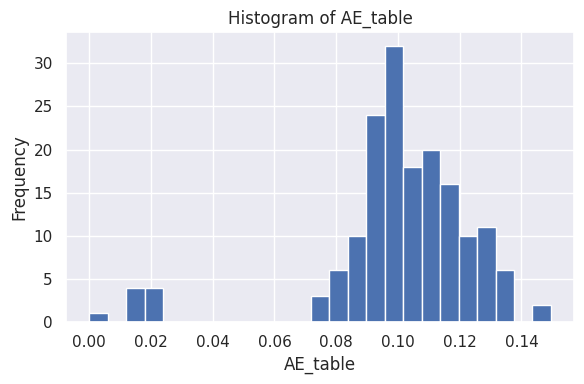

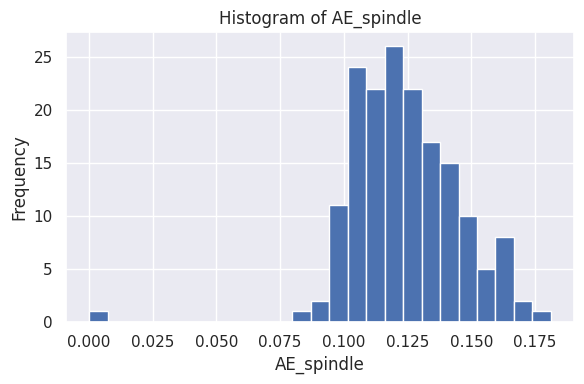

In [ ]:
#3: Shape

# Histogram
for col in numerical_cols:
    mp.figure(figsize=(6, 4))
    df[col].hist(bins=25)
    mp.title(f'Histogram of {col}')
    mp.xlabel(col)
    mp.ylabel('Frequency')
    mp.tight_layout()
    mp.show()

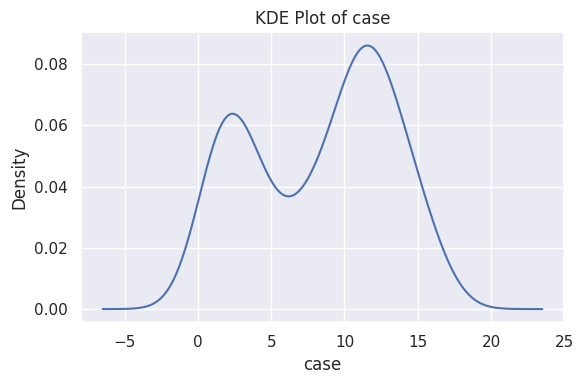

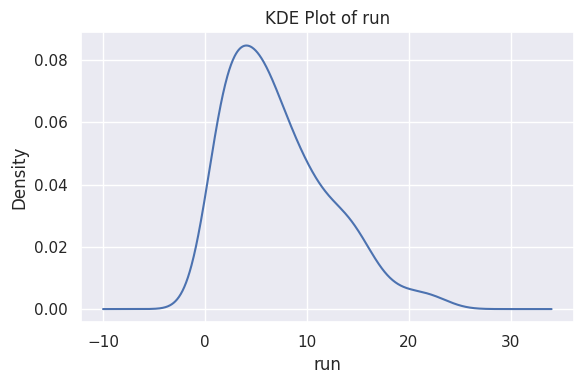

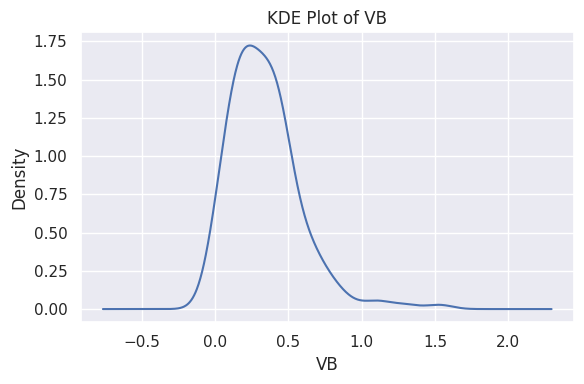

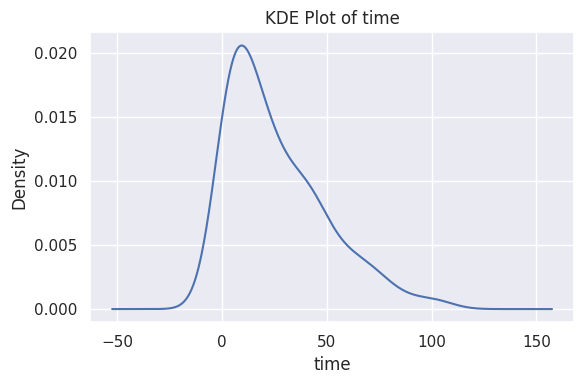

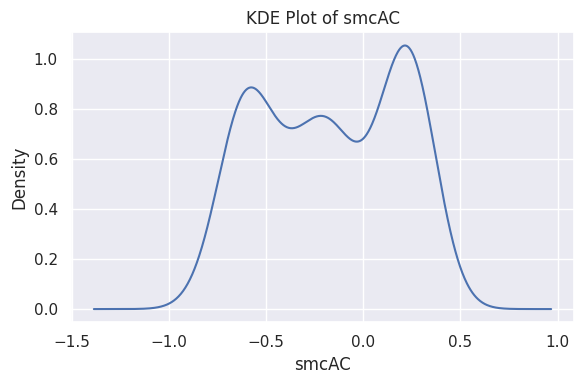

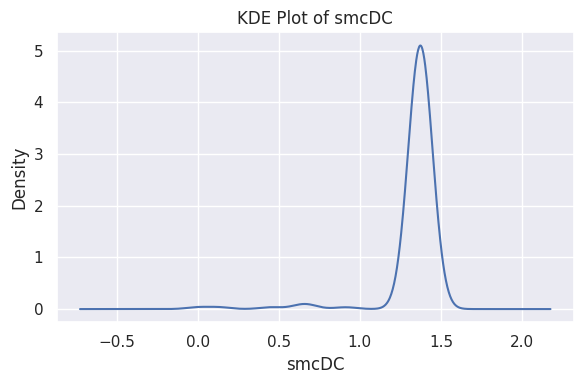

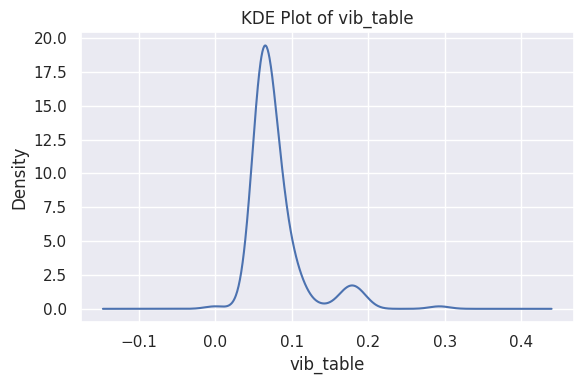

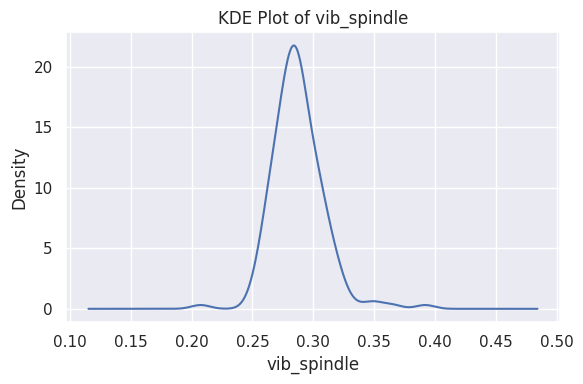

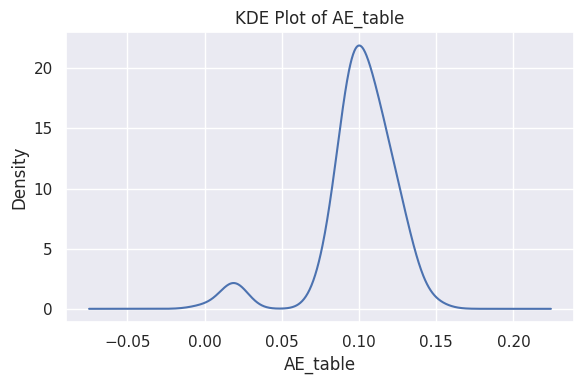

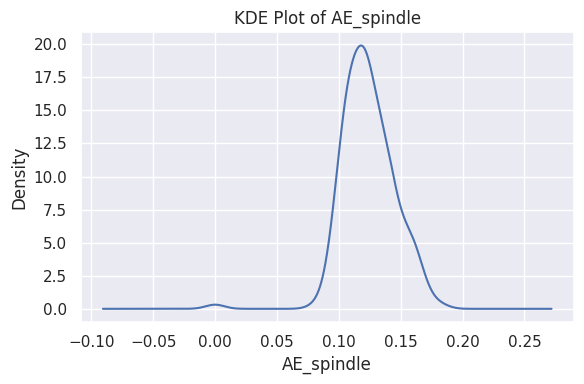

In [ ]:
# KDE Plots
for col in numerical_cols:
    mp.figure(figsize=(6, 4))
    df[col].plot(kind='kde')
    mp.title(f'KDE Plot of {col}')
    mp.xlabel(col)
    mp.ylabel('Density')
    mp.tight_layout()
    mp.show()

**Is the distribution symmetric?
Is it right-skewed or left-skewed?
Is it multi-modal?**

*   **case**: Not applicable (discrete), multi-modal.
*   **run**: Not applicable (discrete), multi-modal.
*   **VB**:  Right-skewed, uni-modal.
*   **time**: Right-skewed, uni-modal.
*   **smcAC**: Right-skewed, uni-modal.
*   **smcDC**: Closer to symmetric, uni-modal.
*   **vib_table**: Closer to symmetric, uni-modal.
*   **vib_spindle**: Closer to symmetric, uni-modal.
*   **AE_table**: Right-skewed, uni-modal.
*   **AE_spindle**: Right-skewed, uni-modal.


 Outlier Detection for 'case'

IQR Method: 7.0
Lower Bound: -5.5000
Upper Bound: 22.5000
Number of Outliers: 0

Median: 10.0
MAD: 3.0000
Number of Outliers: 0

 Outlier Detection for 'run'

IQR Method: 6.25
Lower Bound: -6.3750
Upper Bound: 18.6250
Number of Outliers: 1
Outliers detected:    run
92   19

Median: 6.0
MAD: 3.0000
Number of Outliers: 0

 Outlier Detection for 'VB'

IQR Method: 0.279529044765057
Lower Bound: -0.2518
Upper Bound: 0.8663
Number of Outliers: 0

Median: 0.32
MAD: 0.1407
Number of Outliers: 0

 Outlier Detection for 'time'

IQR Method: 30.25
Lower Bound: -36.6250
Upper Bound: 84.3750
Number of Outliers: 0

Median: 19.0
MAD: 13.5000
Number of Outliers: 0

 Outlier Detection for 'smcAC'

IQR Method: 0.72509875
Lower Bound: -1.6418
Upper Bound: 1.2585
Number of Outliers: 0

Median: -0.20264
MAD: 0.3613
Number of Outliers: 0

 Outlier Detection for 'smcDC'

IQR Method: 0.04394500000000012
Lower Bound: 1.2866
Upper Bound: 1.4624
Number of Outliers: 0

Median: 1.374

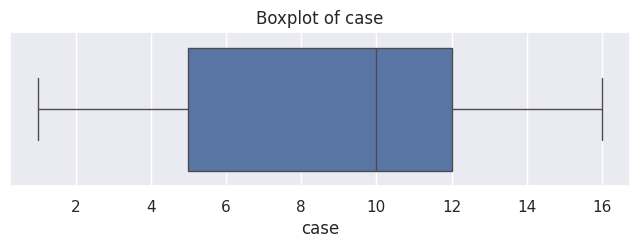

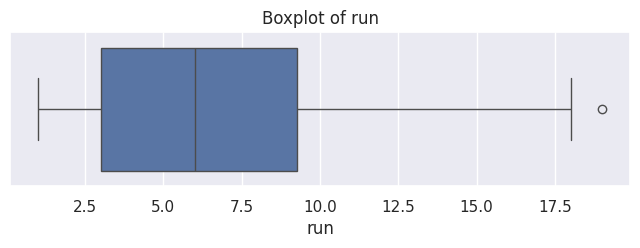

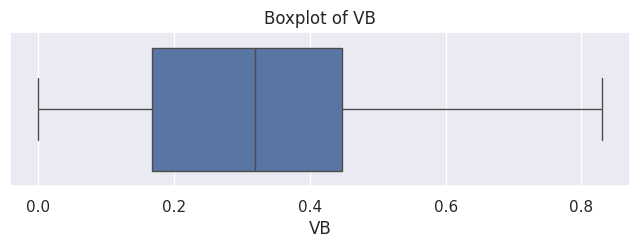

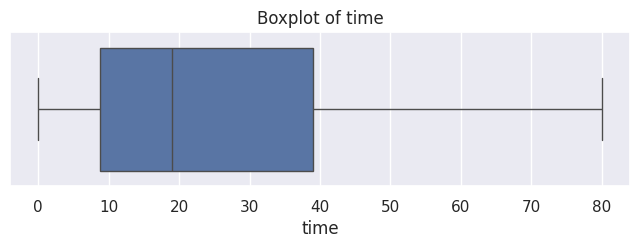

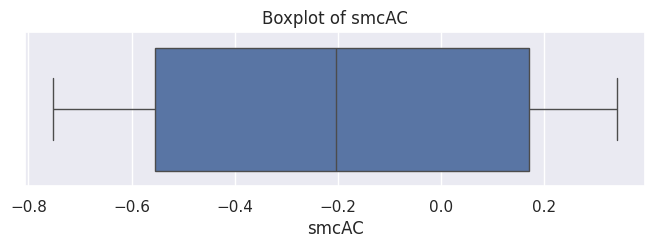

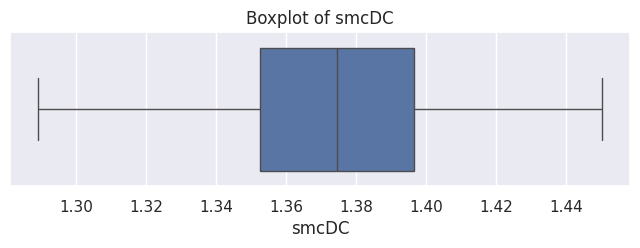

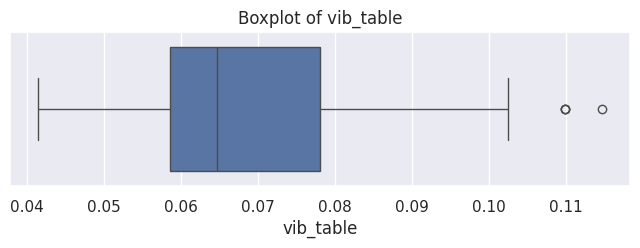

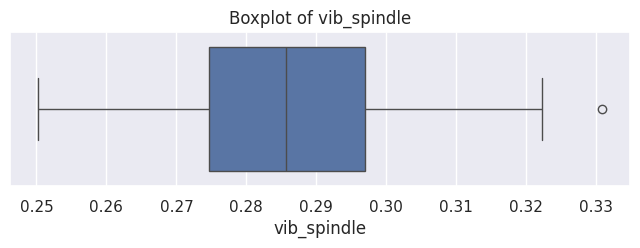

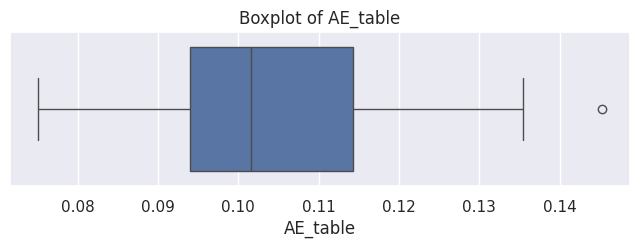

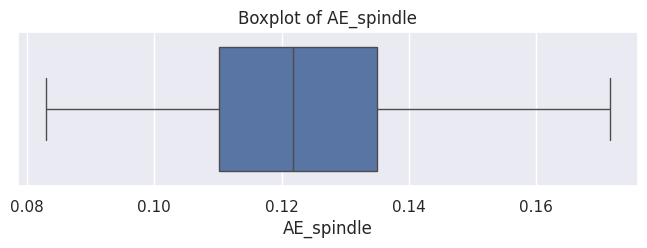

In [ ]:
#4: Outlier detection

for col in numerical_cols:
    print(f"\n Outlier Detection for '{col}'")

    #Boxplot
    mp.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    mp.title(f'Boxplot of {col}')

    #IQR Method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers_iqr = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]

    print(f"\nIQR Method: {IQR}")
    print(f"Lower Bound: {Q1 - 1.5 * IQR:.4f}")
    print(f"Upper Bound: {Q3 + 1.5 * IQR:.4f}")
    print(f"Number of Outliers: {len(outliers_iqr)}")
    if not outliers_iqr.empty:
        print(f"Outliers detected:{outliers_iqr[[col]]}")

    #Modified Z-score
    median_val = np.median(df[col])
    mad = np.median(np.abs(df[col] - median_val))

    if mad == 0:
        modified_z = np.zeros(len(df[col]))
    else:
        modified_z = 0.6745 * (df[col] - median_val) / mad

    outliers_mod_z = df[np.abs(modified_z) > 3.5]

    print(f"\nMedian: {median_val}")
    print(f"MAD: {mad:.4f}")
    print(f"Number of Outliers: {len(outliers_mod_z)}")
    if not outliers_mod_z.empty:
        print(f"Outliers detected:{outliers_mod_z[[col]].T}")

I used both methods, IQR is easier but modified Z score is more accurate.


# Task 4

In [ ]:
#Correlation matrix
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,case,run,VB,time,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
case,1.000000,-0.189246,0.115179,-0.213471,0.104186,-0.224908,-0.544150,-0.134446,-0.039191,-0.016049
run,-0.189246,1.000000,0.498010,0.930212,-0.002274,0.380997,0.232192,-0.161188,-0.152396,-0.117926
VB,0.115179,0.498010,1.000000,0.462247,0.050055,0.143102,-0.086521,-0.193172,-0.156920,-0.166434
time,-0.213471,0.930212,0.462247,1.000000,0.035104,0.352374,0.266305,-0.202370,-0.009018,0.009225
smcAC,0.104186,-0.002274,0.050055,0.035104,1.000000,0.277399,-0.072413,-0.116491,-0.105464,-0.092711
smcDC,-0.224908,0.380997,0.143102,0.352374,0.277399,1.000000,0.084847,-0.086665,-0.137907,-0.110745
vib_table,-0.544150,0.232192,-0.086521,0.266305,-0.072413,0.084847,1.000000,-0.045628,0.143680,0.108403
vib_spindle,-0.134446,-0.161188,-0.193172,-0.202370,-0.116491,-0.086665,-0.045628,1.000000,-0.053698,-0.073113
AE_table,-0.039191,-0.152396,-0.156920,-0.009018,-0.105464,-0.137907,0.143680,-0.053698,1.000000,0.956782
AE_spindle,-0.016049,-0.117926,-0.166434,0.009225,-0.092711,-0.110745,0.108403,-0.073113,0.956782,1.000000


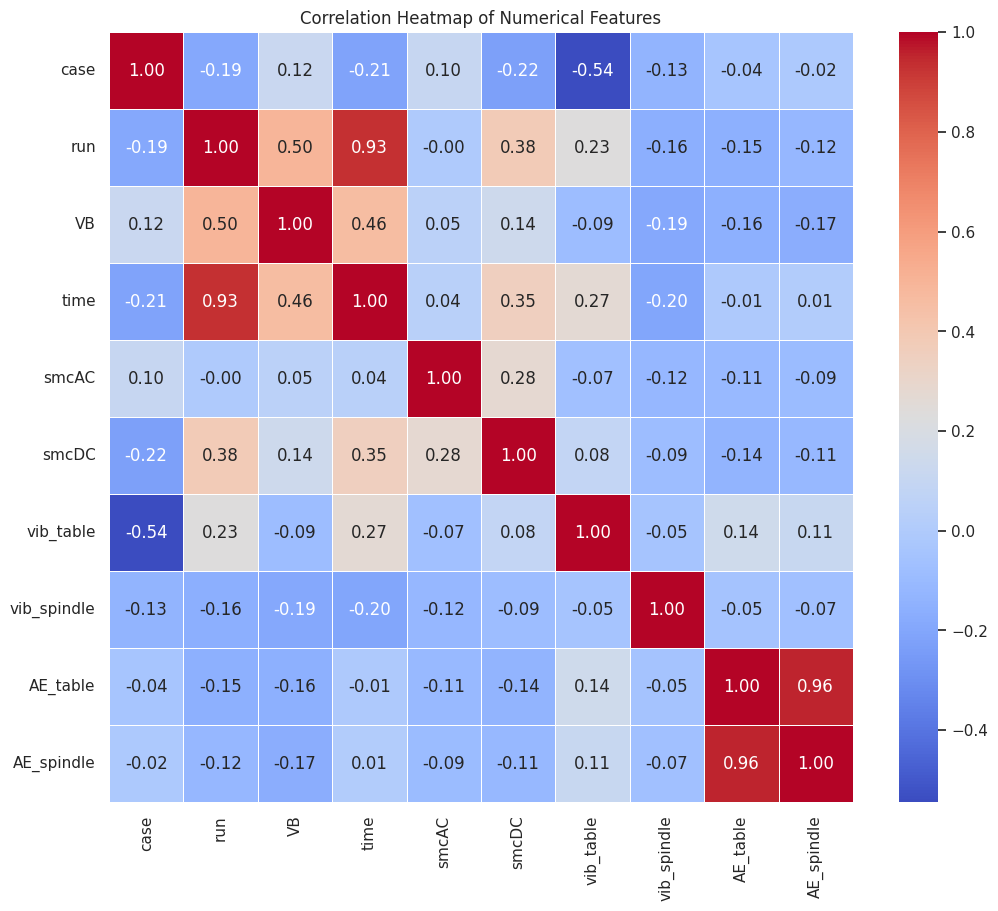

In [ ]:
#Correlation heatmap
mp.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = .5)
mp.title("Correlation Heatmap of Numerical Features")
mp.show()


**Does tool wear strongly correlate with vibration?**
  
  Tool wear **VB** shows a very weak to weak negative correlation with vibration sensors **vib_table** and **vib_spindle**. The correlation coefficients are close to zero (-0.0865 and -0.1932 respectively).

**Which sensor appears most predictive of tool wear?**

**vib_spindle** as it has the highest absolute correlation with **VB** (0.1932).

**Are any features redundant?**
  
  Yes. There is a very high positive correlation between **run** and **time** (0.9302). Similarly, **AE_table** and **AE_spindle** also show a very strong positive correlation (0.9568), suggesting redundancy.

# Task 5

In [ ]:
#Histogram (tool wear)
mp.figure(figsize=(8, 6))
sns.histplot(df['VB'], kde=True)
mp.title('Distribution of Tool Wear')
mp.xlabel('Tool Wear')
mp.ylabel('Frequency')
mp.tight_layout()
mp.show()

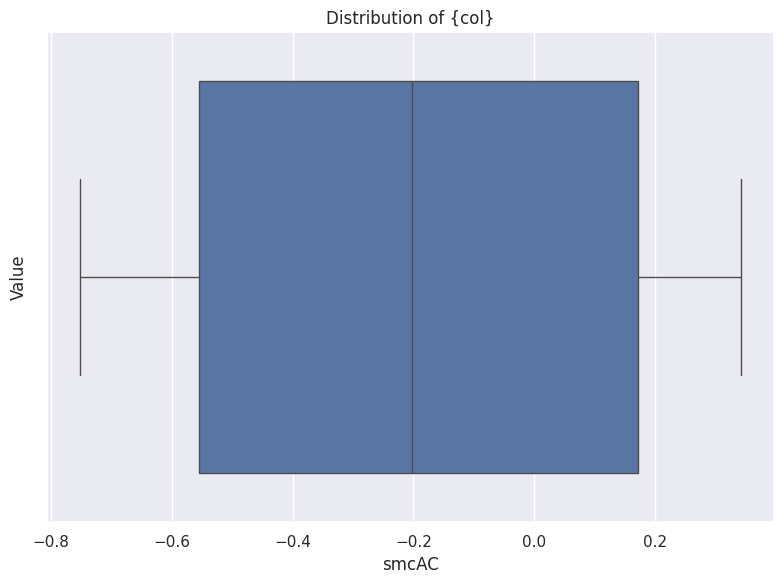

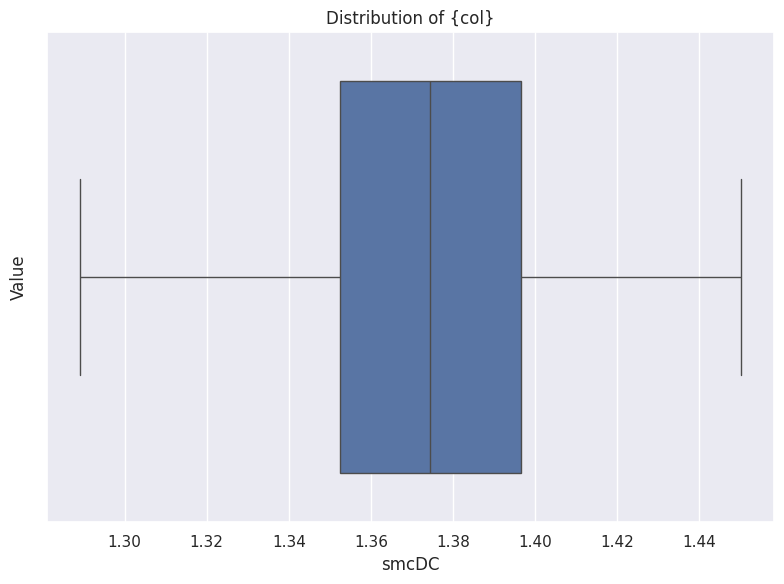

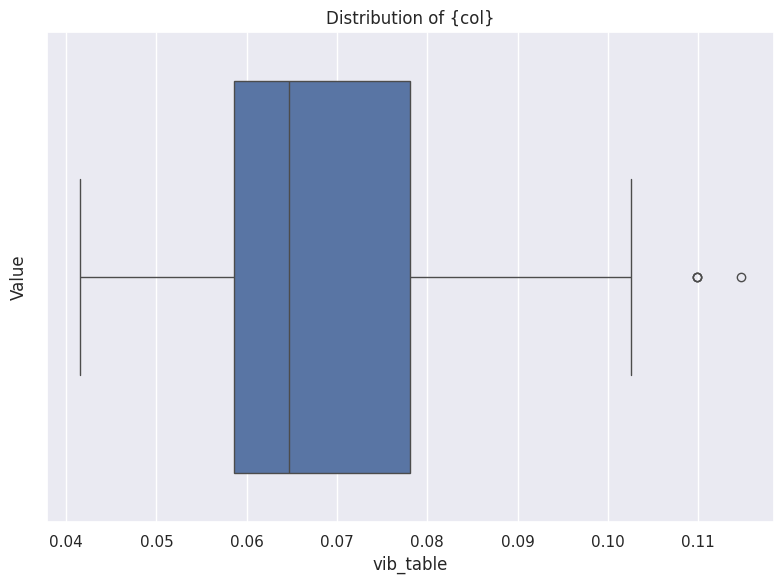

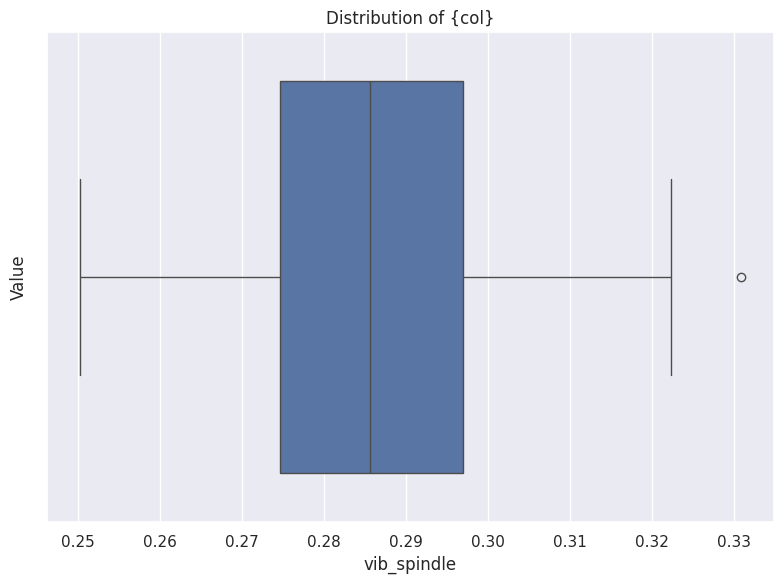

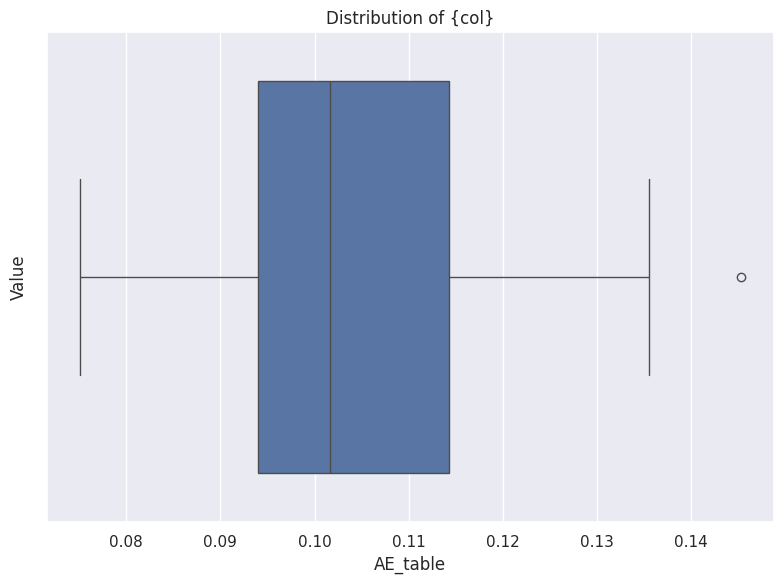

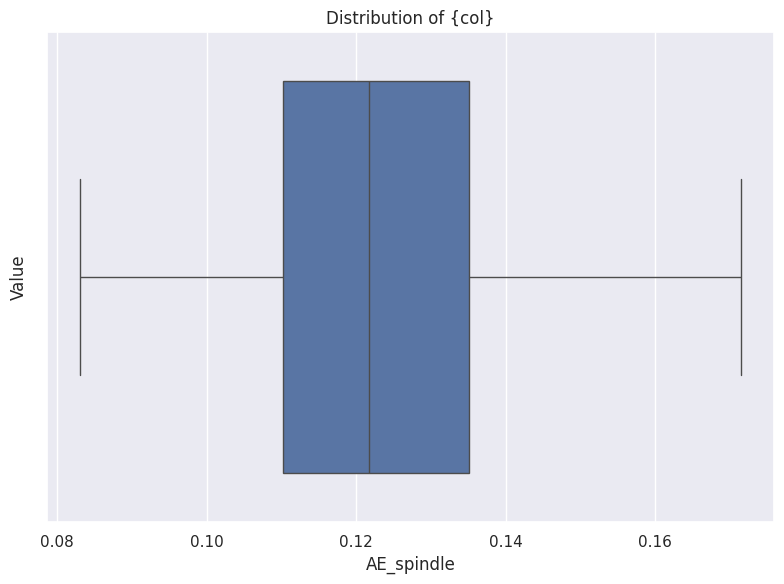

In [ ]:
#Box plot for Sensors
sensor_cols = ['smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']

for col in sensor_cols:
    mp.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    mp.title('Distribution of {col}')
    mp.xlabel(col)
    mp.ylabel('Value')
    mp.tight_layout()
    mp.show()

In [ ]:
#Scatter plot for Tool Wear vs. Vibration
#vib_table

mp.figure(figsize = (10, 6))
sns.scatterplot(x = 'vib_table', y = 'VB', data = df)
mp.title('Tool Wear (VB) vs. Vibration (vib_table)')
mp.xlabel('Vibration (vib_table)')
mp.ylabel('Tool Wear (VB)')
mp.tight_layout()
mp.show()

In [ ]:
#vib_spindle
mp.figure(figsize=(10, 6))
sns.scatterplot(x = 'vib_spindle', y = 'VB', data=df)
mp.title('Tool Wear (VB) vs. Vibration (vib_spindle)')
mp.xlabel('Vibration (vib_spindle)')
mp.ylabel('Tool Wear (VB)')
mp.tight_layout()
mp.show()

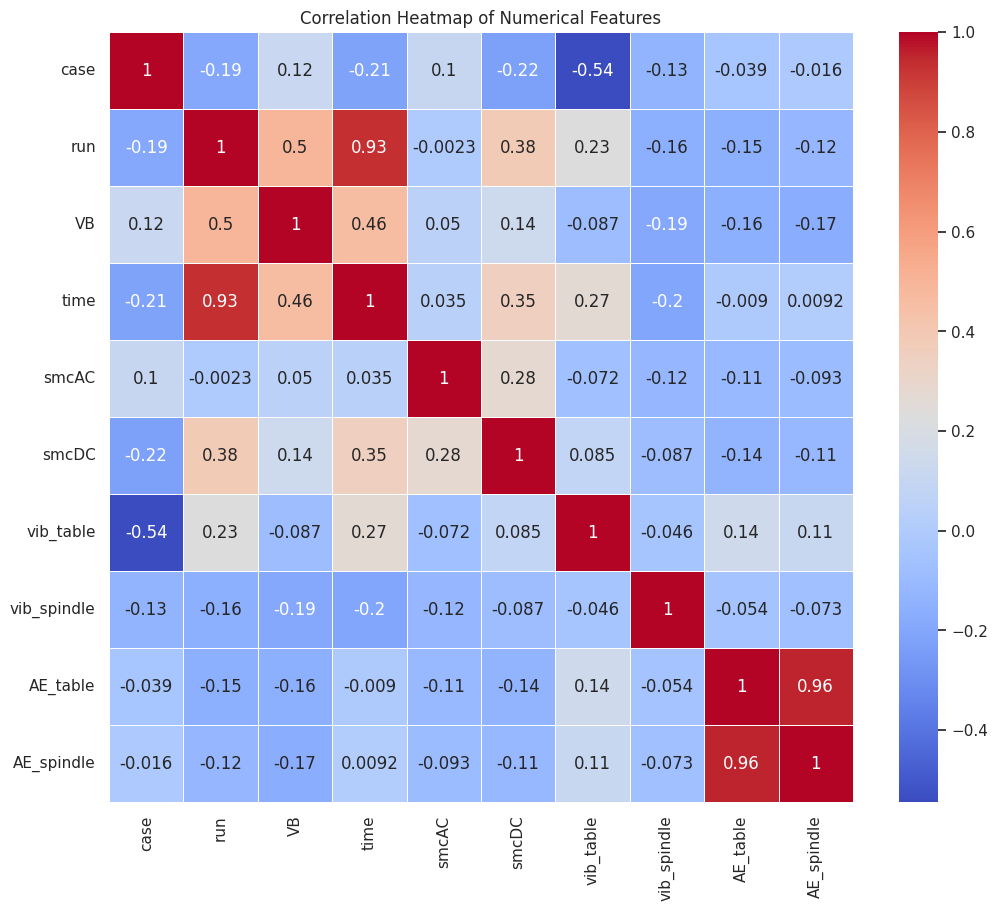

In [ ]:
#Correlation Heatmap
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

mp.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths=.5)
mp.title('Correlation Heatmap of Numerical Features')
mp.show()

# Engineering Thinking Questions



**1. Which parameter affects tool wear the most?**
    
  Among all features currently in the dataset, the **run** parameter shows the strongest positive correlation with VB (Tool Wear) at **0.4980**.

**2. Which sensor signal is most stable?**
  
  Comparing the standard deviations of the sensor signals, the **AE_table** sensor signal appears to be the most stable, having the lowest standard deviation (0.01435)

**3. Are there abnormal machining cycles?**
  
  Yes, the outlier detection analysis indicated the presence of outliers in several columns, including **run, vib_table, vib_spindle**, and **AE_table**. These outliers suggest that there are instances of abnormal machining cycles or unusual events that deviate significantly from the typical operating conditions.

**4. Can tool wear be predicted from sensor data?**
  
  Yes, tool wear can potentially be predicted from sensor data, but the **linear correlation observed is weak**.
  
While **run** and **time** show stronger correlations with **VB**, the direct sensor signals like **vib_spindle** (-0.1932) and **AE_spindle** (-0.1664) have only weak correlations. This suggests that a simple linear model might not be highly accurate. However, more complex Machine Learning models could potentially capture non-linear relationships and interactions between sensors that might be more predictive.

**5. If building a Machine Learning model, which features would you select?**
  
  For a more complex Machine Learning Model, I would select the following:
  1. **run**: as it affects tool wear the most.
  2. **time**: strong coorelation with tool wear.
  3. **AE_table**: as this produces the most stable sensor mesaurements.
  